## Cargar datos `train.csv` con pandas



In [1]:
import pandas as pd
import numpy as np

z = pd.read_csv("train.csv")
print ("shape of loaded dataframe", z.shape)


shape of loaded dataframe (692500, 21)


In [2]:
z.head()

,ID,PERIODO_ACADEMICO,E_PRGM_ACADEMICO,E_PRGM_DEPARTAMENTO,E_VALORMATRICULAUNIVERSIDAD,E_HORASSEMANATRABAJA,F_ESTRATOVIVIENDA,F_TIENEINTERNET,F_EDUCACIONPADRE,F_TIENELAVADORA,...,E_PRIVADO_LIBERTAD,E_PAGOMATRICULAPROPIO,F_TIENECOMPUTADOR,F_TIENEINTERNET.1,F_EDUCACIONMADRE,RENDIMIENTO_GLOBAL,INDICADOR_1,INDICADOR_2,INDICADOR_3,INDICADOR_4
0,904256,20212,ENFERMERIA,BOGOTÁ,Entre 5.5 millones y menos de 7 millones,Menos de 10 horas,Estrato 3,Si,Técnica o tecnológica incompleta,Si,...,N,No,Si,Si,Postgrado,medio-alto,0.322,0.208,0.310,0.267
1,645256,20212,DERECHO,ATLANTICO,Entre 2.5 millones y menos de 4 millones,0,Estrato 3,No,Técnica o tecnológica completa,Si,...,N,No,Si,No,Técnica o tecnológica incompleta,bajo,0.311,0.215,0.292,0.264
2,308367,20203,MERCADEO Y PUBLICIDAD,BOGOTÁ,Entre 2.5 millones y menos de 4 millones,Más de 30 horas,Estrato 3,Si,Secundaria (Bachillerato) completa,Si,...,N,No,No,Si,Secundaria (Bachillerato) completa,bajo,0.297,0.214,0.305,0.264
3,470353,20195,ADMINISTRACION DE EMPRESAS,SANTANDER,Entre 4 millones y menos de 5.5 millones,0,Estrato 4,Si,No sabe,Si,...,N,No,Si,Si,Secundaria (Bachillerato) completa,alto,0.485,0.172,0.252,0.190
4,989032,20212,PSICOLOGIA,ANTIOQUIA,Entre 2.5 millones y menos de 4 millones,Entre 21 y 30 horas,Estrato 3,Si,Primaria completa,Si,...,N,No,Si,Si,Primaria completa,medio-bajo,0.316,0.232,0.285,0.294


# Información general



Dado que disponemos de 692 mil registros en total, observamos una cantidad relativamente pequeña de valores faltantes en cada columna.

In [3]:
z.isna().sum()

ID                                 0
PERIODO_ACADEMICO                  0
E_PRGM_ACADEMICO                   0
E_PRGM_DEPARTAMENTO                0
E_VALORMATRICULAUNIVERSIDAD     6287
E_HORASSEMANATRABAJA           30857
F_ESTRATOVIVIENDA              32137
F_TIENEINTERNET                26629
F_EDUCACIONPADRE               23178
F_TIENELAVADORA                39773
F_TIENEAUTOMOVIL               43623
E_PRIVADO_LIBERTAD                 0
E_PAGOMATRICULAPROPIO           6498
F_TIENECOMPUTADOR              38103
F_TIENEINTERNET.1              26629
F_EDUCACIONMADRE               23664
RENDIMIENTO_GLOBAL                 0
INDICADOR_1                        0
INDICADOR_2                        0
INDICADOR_3                        0
INDICADOR_4                        0
dtype: int64

In [4]:
z.dtypes

ID                               int64
PERIODO_ACADEMICO                int64
E_PRGM_ACADEMICO                object
E_PRGM_DEPARTAMENTO             object
E_VALORMATRICULAUNIVERSIDAD     object
E_HORASSEMANATRABAJA            object
F_ESTRATOVIVIENDA               object
F_TIENEINTERNET                 object
F_EDUCACIONPADRE                object
F_TIENELAVADORA                 object
F_TIENEAUTOMOVIL                object
E_PRIVADO_LIBERTAD              object
E_PAGOMATRICULAPROPIO           object
F_TIENECOMPUTADOR               object
F_TIENEINTERNET.1               object
F_EDUCACIONMADRE                object
RENDIMIENTO_GLOBAL              object
INDICADOR_1                    float64
INDICADOR_2                    float64
INDICADOR_3                    float64
INDICADOR_4                    float64
dtype: object

# Revisión de columnas

## Periodo

Opciones de Preprocesamiento (Año y Periodo):

* Separar año y periodo en dos columnas: Se pueden tratar como números (recomendado por el profesor) o como etiquetas.

* Periodos: Trabajar como números o como etiquetas.

Importante: Usar periodos como etiquetas impide predecir fuera de los datos conocidos y podría causar sobreajuste, aunque mejore la precisión en el test.

In [5]:
def categorize_period(p):
    year: int = int(p / 10)
    period: int = int(p - (year * 10))

    return str(period)

def categorize_year(p):
    year: int = int(p / 10)

    return str(year)

In [6]:
sorted(z.PERIODO_ACADEMICO.unique())

[np.int64(20183),
 np.int64(20184),
 np.int64(20194),
 np.int64(20195),
 np.int64(20196),
 np.int64(20202),
 np.int64(20203),
 np.int64(20212),
 np.int64(20213)]

In [7]:
z['Periodo'] = z["PERIODO_ACADEMICO"].apply(categorize_period)
z['Anio'] = z["PERIODO_ACADEMICO"].apply(categorize_year)

In [8]:
z['Periodo'].value_counts()

Periodo
3    337834
5    180873
2    171902
4      1726
6       165
Name: count, dtype: int64

In [9]:
z['Anio'].value_counts()

Anio
2019    182510
2021    172590
2020    172328
2018    165072
Name: count, dtype: int64

### Tratamiendo de columna: OneHot
Aplica One-Hot Encoding a las columnas 'Anio' y 'Periodo', eliminando las originales.

In [10]:
df_onehot = pd.get_dummies(z['Anio'], prefix='ANIO_')
z = pd.concat([z, df_onehot], axis=1)
df_onehot = pd.get_dummies(z['Periodo'], prefix='PERIODO_')
z = pd.concat([z, df_onehot], axis=1)

In [11]:
z = z.drop(columns=['PERIODO_ACADEMICO'])
z = z.drop(columns=['Anio'])
z = z.drop(columns=['Periodo'])

In [12]:
z.head()

,ID,E_PRGM_ACADEMICO,E_PRGM_DEPARTAMENTO,E_VALORMATRICULAUNIVERSIDAD,E_HORASSEMANATRABAJA,F_ESTRATOVIVIENDA,F_TIENEINTERNET,F_EDUCACIONPADRE,F_TIENELAVADORA,F_TIENEAUTOMOVIL,...,INDICADOR_4,ANIO__2018,ANIO__2019,ANIO__2020,ANIO__2021,PERIODO__2,PERIODO__3,PERIODO__4,PERIODO__5,PERIODO__6
0,904256,ENFERMERIA,BOGOTÁ,Entre 5.5 millones y menos de 7 millones,Menos de 10 horas,Estrato 3,Si,Técnica o tecnológica incompleta,Si,Si,...,0.267,False,False,False,True,True,False,False,False,False
1,645256,DERECHO,ATLANTICO,Entre 2.5 millones y menos de 4 millones,0,Estrato 3,No,Técnica o tecnológica completa,Si,No,...,0.264,False,False,False,True,True,False,False,False,False
2,308367,MERCADEO Y PUBLICIDAD,BOGOTÁ,Entre 2.5 millones y menos de 4 millones,Más de 30 horas,Estrato 3,Si,Secundaria (Bachillerato) completa,Si,No,...,0.264,False,False,True,False,False,True,False,False,False
3,470353,ADMINISTRACION DE EMPRESAS,SANTANDER,Entre 4 millones y menos de 5.5 millones,0,Estrato 4,Si,No sabe,Si,No,...,0.190,False,True,False,False,False,False,False,True,False
4,989032,PSICOLOGIA,ANTIOQUIA,Entre 2.5 millones y menos de 4 millones,Entre 21 y 30 horas,Estrato 3,Si,Primaria completa,Si,Si,...,0.294,False,False,False,True,True,False,False,False,False


## Consideraciones para la Columna 'Programa Académico'

Para el manejo de la columna 'Programa Académico' se sugieren los siguientes puntos:

* 'Programa Académico': Agrupar carreras en categorías amplias (ej. Ingeniería, Licenciatura), ya que hay demasiadas para One-Hot Encoding.

* Factores predictivos: Considerar las áreas del examen (Matemáticas, Lectura Crítica, Sociales y Ciudadanas, Ciencias Naturales, Inglés).

* Limpieza de datos: Buscar y unificar posibles carreras duplicadas utilizando la distancia de edición.



In [13]:
len(sorted(z.E_PRGM_ACADEMICO.unique()))

948

Aclaración: La clasificación se realizó priorizando la temática central.

### Tratamiento de columna: Reducción de etiqueta, mapeo y variable nominal

Se define una función para agrupar programas académicos en categorías más amplias, simplificando la columna 'ESTU_PRGM_ACADEMICO'.

In [14]:
len(z.E_PRGM_ACADEMICO.unique())

948

In [15]:
import pandas as pd
import numpy as np
import re

# Función para categorizar programas académicos usando patrones de texto
def categorize_program(program):
    program = program.lower()  # Normaliza el texto a minúsculas para comparaciones uniformes

    # Establece las reglas de clasificación basadas en palabras clave relevantes
    if re.search(r'admin|ges|neg|fin|conta', program):
        return 'Administracion_y_Negocios'

    elif re.search(r'(inge(nier.a)?)', program):
        return 'Ingenieria'

    elif re.search(r'lice|edu|pedago', program):
        return 'Licenciatura'

    elif re.search(r'(med.+?c(.+?)?[ao](\b|^))|(salud)|(farma)|(psic)|(terapia)|(veteri)|(enfer)', program):
        return 'Medicina'

    elif re.search(r'\bderecho|juridic', program):
        return 'Derecho'

    elif re.search(r'merc|publici|tecnia', program):
        return 'Mercadeo_y_Publicidad'

    elif re.search(r'comput', program):
        return 'Computacion'

    elif re.search(r'dise|art(e|.sti)|m[uú]s|cine|telev|audiovis|fotog|danz|tea|core', program):
        return 'Artes'

    elif re.search(r'cienc((.+?\bnat)|.+?^)|geo|bio|qu.m|f.sic|amb', program) and not re.search(r'edu|deporte|recre', program):
        return 'Ciencias'

    elif re.search(r'cienc.+?soci|sociolo|human|antropolog|histor|filos|', program):
        return 'Ciencias_Sociales_y_Humanidades'

    elif re.search(r'filol|letr', program):
        return 'Letras'

    elif re.search(r'idio|leng|extr|espa..?ol|ingl|fran', program):
        return 'Lenguas'

    else:
        return 'Otros'

In [16]:
len(z.E_PRGM_ACADEMICO.unique())

948

In [17]:
sorted(z.E_PRGM_ACADEMICO.unique())

['3°  CICLO PROFESIONAL NEGOCIOS INTERNACIONALES',
 'ACTIVIDAD FISICA Y DEPORTE',
 'ACUICULTURA',
 'ADMINISTRACION',
 'ADMINISTRACION  FINANCIERA',
 'ADMINISTRACION & SERVICIO',
 'ADMINISTRACION AERONAUTICA',
 'ADMINISTRACION AGROPECUARIA',
 'ADMINISTRACION AMBIENTAL',
 'ADMINISTRACION AMBIENTAL Y DE LOS RECURSOS NATURALES',
 'ADMINISTRACION BANCARIA Y FINANCIERA',
 'ADMINISTRACION COMERCIAL',
 'ADMINISTRACION COMERCIAL Y DE MERCADEO',
 'ADMINISTRACION DE COMERCIO EXTERIOR',
 'ADMINISTRACION DE EMPRESAS',
 'ADMINISTRACION DE EMPRESAS  Y  GESTION AMBIENTAL',
 'ADMINISTRACION DE EMPRESAS AGROINDUSTRIALES',
 'ADMINISTRACION DE EMPRESAS AGROPECUARIAS',
 'ADMINISTRACION DE EMPRESAS COMERCIALES',
 'ADMINISTRACION DE EMPRESAS EN TELECOMUNICACIONES',
 'ADMINISTRACION DE EMPRESAS TURISTICA',
 'ADMINISTRACION DE EMPRESAS TURISTICAS',
 'ADMINISTRACION DE EMPRESAS TURISTICAS Y HOTELERAS',
 'ADMINISTRACION DE EMPRESAS TURÍSTICAS Y HOTELERAS',
 'ADMINISTRACION DE EMPRESAS Y FINANZAS',
 'ADMINISTRACI

In [18]:
z.E_PRGM_ACADEMICO

0                                  ENFERMERIA
1                                     DERECHO
2                       MERCADEO Y PUBLICIDAD
3                  ADMINISTRACION DE EMPRESAS
4                                  PSICOLOGIA
                         ...                 
692495                               BIOLOGIA
692496                             PSICOLOGIA
692497    ADMINISTRACIÓN EN SALUD OCUPACIONAL
692498                             PSICOLOGIA
692499                             PSICOLOGIA
Name: E_PRGM_ACADEMICO, Length: 692500, dtype: object

In [19]:
z['Categoria'] = z['E_PRGM_ACADEMICO'].apply(categorize_program)
z['Categoria'].value_counts()

Categoria
Administracion_y_Negocios          201457
Ingenieria                         146551
Medicina                            98394
Ciencias_Sociales_y_Humanidades     87176
Licenciatura                        66661
Derecho                             53696
Artes                               17770
Mercadeo_y_Publicidad               12344
Ciencias                             8307
Computacion                           144
Name: count, dtype: int64

In [20]:
del z["E_PRGM_ACADEMICO"]
z.head()

,ID,E_PRGM_DEPARTAMENTO,E_VALORMATRICULAUNIVERSIDAD,E_HORASSEMANATRABAJA,F_ESTRATOVIVIENDA,F_TIENEINTERNET,F_EDUCACIONPADRE,F_TIENELAVADORA,F_TIENEAUTOMOVIL,E_PRIVADO_LIBERTAD,...,ANIO__2018,ANIO__2019,ANIO__2020,ANIO__2021,PERIODO__2,PERIODO__3,PERIODO__4,PERIODO__5,PERIODO__6,Categoria
0,904256,BOGOTÁ,Entre 5.5 millones y menos de 7 millones,Menos de 10 horas,Estrato 3,Si,Técnica o tecnológica incompleta,Si,Si,N,...,False,False,False,True,True,False,False,False,False,Medicina
1,645256,ATLANTICO,Entre 2.5 millones y menos de 4 millones,0,Estrato 3,No,Técnica o tecnológica completa,Si,No,N,...,False,False,False,True,True,False,False,False,False,Derecho
2,308367,BOGOTÁ,Entre 2.5 millones y menos de 4 millones,Más de 30 horas,Estrato 3,Si,Secundaria (Bachillerato) completa,Si,No,N,...,False,False,True,False,False,True,False,False,False,Mercadeo_y_Publicidad
3,470353,SANTANDER,Entre 4 millones y menos de 5.5 millones,0,Estrato 4,Si,No sabe,Si,No,N,...,False,True,False,False,False,False,False,True,False,Administracion_y_Negocios
4,989032,ANTIOQUIA,Entre 2.5 millones y menos de 4 millones,Entre 21 y 30 horas,Estrato 3,Si,Primaria completa,Si,Si,N,...,False,False,False,True,True,False,False,False,False,Medicina


#### OneHot
Transforma 'Categoria' a formato binario (One-Hot) y elimina la original.

In [21]:
df_onehot = pd.get_dummies(z['Categoria'])
z = pd.concat([z, df_onehot], axis=1)
del z["Categoria"]
z.head()

,ID,E_PRGM_DEPARTAMENTO,E_VALORMATRICULAUNIVERSIDAD,E_HORASSEMANATRABAJA,F_ESTRATOVIVIENDA,F_TIENEINTERNET,F_EDUCACIONPADRE,F_TIENELAVADORA,F_TIENEAUTOMOVIL,E_PRIVADO_LIBERTAD,...,Administracion_y_Negocios,Artes,Ciencias,Ciencias_Sociales_y_Humanidades,Computacion,Derecho,Ingenieria,Licenciatura,Medicina,Mercadeo_y_Publicidad
0,904256,BOGOTÁ,Entre 5.5 millones y menos de 7 millones,Menos de 10 horas,Estrato 3,Si,Técnica o tecnológica incompleta,Si,Si,N,...,False,False,False,False,False,False,False,False,True,False
1,645256,ATLANTICO,Entre 2.5 millones y menos de 4 millones,0,Estrato 3,No,Técnica o tecnológica completa,Si,No,N,...,False,False,False,False,False,True,False,False,False,False
2,308367,BOGOTÁ,Entre 2.5 millones y menos de 4 millones,Más de 30 horas,Estrato 3,Si,Secundaria (Bachillerato) completa,Si,No,N,...,False,False,False,False,False,False,False,False,False,True
3,470353,SANTANDER,Entre 4 millones y menos de 5.5 millones,0,Estrato 4,Si,No sabe,Si,No,N,...,True,False,False,False,False,False,False,False,False,False
4,989032,ANTIOQUIA,Entre 2.5 millones y menos de 4 millones,Entre 21 y 30 horas,Estrato 3,Si,Primaria completa,Si,Si,N,...,False,False,False,False,False,False,False,False,True,False


In [22]:
z.head()

,ID,E_PRGM_DEPARTAMENTO,E_VALORMATRICULAUNIVERSIDAD,E_HORASSEMANATRABAJA,F_ESTRATOVIVIENDA,F_TIENEINTERNET,F_EDUCACIONPADRE,F_TIENELAVADORA,F_TIENEAUTOMOVIL,E_PRIVADO_LIBERTAD,...,Administracion_y_Negocios,Artes,Ciencias,Ciencias_Sociales_y_Humanidades,Computacion,Derecho,Ingenieria,Licenciatura,Medicina,Mercadeo_y_Publicidad
0,904256,BOGOTÁ,Entre 5.5 millones y menos de 7 millones,Menos de 10 horas,Estrato 3,Si,Técnica o tecnológica incompleta,Si,Si,N,...,False,False,False,False,False,False,False,False,True,False
1,645256,ATLANTICO,Entre 2.5 millones y menos de 4 millones,0,Estrato 3,No,Técnica o tecnológica completa,Si,No,N,...,False,False,False,False,False,True,False,False,False,False
2,308367,BOGOTÁ,Entre 2.5 millones y menos de 4 millones,Más de 30 horas,Estrato 3,Si,Secundaria (Bachillerato) completa,Si,No,N,...,False,False,False,False,False,False,False,False,False,True
3,470353,SANTANDER,Entre 4 millones y menos de 5.5 millones,0,Estrato 4,Si,No sabe,Si,No,N,...,True,False,False,False,False,False,False,False,False,False
4,989032,ANTIOQUIA,Entre 2.5 millones y menos de 4 millones,Entre 21 y 30 horas,Estrato 3,Si,Primaria completa,Si,Si,N,...,False,False,False,False,False,False,False,False,True,False


## Departamento

In [23]:
len(z.E_PRGM_DEPARTAMENTO.unique())

31

In [24]:
len(sorted(z.E_PRGM_DEPARTAMENTO.unique()))

31

### Tratamiendo de columna: Variable nominal
Se reemplazan los espacios por guiones bajos en la columna 'ESTU_PRGM_DEPARTAMENTO' para facilitar el acceso y manejo de sus valores.

In [25]:
#Se eliminan los espacios para poder acceder a la variables asi: z.EL_DEPARTAMENTO
z['E_PRGM_DEPARTAMENTO'] = z['E_PRGM_DEPARTAMENTO'].str.replace(' ', '_')
sorted(z.E_PRGM_DEPARTAMENTO.unique())

['AMAZONAS',
 'ANTIOQUIA',
 'ARAUCA',
 'ATLANTICO',
 'BOGOTÁ',
 'BOLIVAR',
 'BOYACA',
 'CALDAS',
 'CAQUETA',
 'CASANARE',
 'CAUCA',
 'CESAR',
 'CHOCO',
 'CORDOBA',
 'CUNDINAMARCA',
 'GUAVIARE',
 'HUILA',
 'LA_GUAJIRA',
 'MAGDALENA',
 'META',
 'NARIÑO',
 'NORTE_SANTANDER',
 'PUTUMAYO',
 'QUINDIO',
 'RISARALDA',
 'SANTANDER',
 'SAN_ANDRES',
 'SUCRE',
 'TOLIMA',
 'VALLE',
 'VAUPES']

#### OneHot
Se aplica One-Hot Encoding a la columna 'ESTU_PRGM_DEPARTAMENTO', creando nuevas columnas binarias con el prefijo 'DEP' y las añade al DataFrame.

In [26]:
df_onehot = pd.get_dummies(z['E_PRGM_DEPARTAMENTO'], prefix='DEP')
z = pd.concat([z, df_onehot], axis=1)

In [27]:
z.head()

,ID,E_PRGM_DEPARTAMENTO,E_VALORMATRICULAUNIVERSIDAD,E_HORASSEMANATRABAJA,F_ESTRATOVIVIENDA,F_TIENEINTERNET,F_EDUCACIONPADRE,F_TIENELAVADORA,F_TIENEAUTOMOVIL,E_PRIVADO_LIBERTAD,...,DEP_NORTE_SANTANDER,DEP_PUTUMAYO,DEP_QUINDIO,DEP_RISARALDA,DEP_SANTANDER,DEP_SAN_ANDRES,DEP_SUCRE,DEP_TOLIMA,DEP_VALLE,DEP_VAUPES
0,904256,BOGOTÁ,Entre 5.5 millones y menos de 7 millones,Menos de 10 horas,Estrato 3,Si,Técnica o tecnológica incompleta,Si,Si,N,...,False,False,False,False,False,False,False,False,False,False
1,645256,ATLANTICO,Entre 2.5 millones y menos de 4 millones,0,Estrato 3,No,Técnica o tecnológica completa,Si,No,N,...,False,False,False,False,False,False,False,False,False,False
2,308367,BOGOTÁ,Entre 2.5 millones y menos de 4 millones,Más de 30 horas,Estrato 3,Si,Secundaria (Bachillerato) completa,Si,No,N,...,False,False,False,False,False,False,False,False,False,False
3,470353,SANTANDER,Entre 4 millones y menos de 5.5 millones,0,Estrato 4,Si,No sabe,Si,No,N,...,False,False,False,False,True,False,False,False,False,False
4,989032,ANTIOQUIA,Entre 2.5 millones y menos de 4 millones,Entre 21 y 30 horas,Estrato 3,Si,Primaria completa,Si,Si,N,...,False,False,False,False,False,False,False,False,False,False


In [28]:
z.drop(columns=['E_PRGM_DEPARTAMENTO'], inplace=True)

In [29]:
z.head()

,ID,E_VALORMATRICULAUNIVERSIDAD,E_HORASSEMANATRABAJA,F_ESTRATOVIVIENDA,F_TIENEINTERNET,F_EDUCACIONPADRE,F_TIENELAVADORA,F_TIENEAUTOMOVIL,E_PRIVADO_LIBERTAD,E_PAGOMATRICULAPROPIO,...,DEP_NORTE_SANTANDER,DEP_PUTUMAYO,DEP_QUINDIO,DEP_RISARALDA,DEP_SANTANDER,DEP_SAN_ANDRES,DEP_SUCRE,DEP_TOLIMA,DEP_VALLE,DEP_VAUPES
0,904256,Entre 5.5 millones y menos de 7 millones,Menos de 10 horas,Estrato 3,Si,Técnica o tecnológica incompleta,Si,Si,N,No,...,False,False,False,False,False,False,False,False,False,False
1,645256,Entre 2.5 millones y menos de 4 millones,0,Estrato 3,No,Técnica o tecnológica completa,Si,No,N,No,...,False,False,False,False,False,False,False,False,False,False
2,308367,Entre 2.5 millones y menos de 4 millones,Más de 30 horas,Estrato 3,Si,Secundaria (Bachillerato) completa,Si,No,N,No,...,False,False,False,False,False,False,False,False,False,False
3,470353,Entre 4 millones y menos de 5.5 millones,0,Estrato 4,Si,No sabe,Si,No,N,No,...,False,False,False,False,True,False,False,False,False,False
4,989032,Entre 2.5 millones y menos de 4 millones,Entre 21 y 30 horas,Estrato 3,Si,Primaria completa,Si,Si,N,No,...,False,False,False,False,False,False,False,False,False,False


# Decisiones de las columnas con NAN
## Manejo del Precio de la Matrícula y Valores Nulos

Preprocesamiento:

* Agrupar en clases ordinales (ej., "No pagó": 0).

* Usar promedios o límites (inferior/superior).

* Aplicar One-Hot Encoding.


Valores Nulos (NaNs):

* Tratar con media, moda o mediana.

* Descartar.

* Rellenar con un valor particular.

* Asumir que un NaN significa "no hubo pago".

In [30]:
z.E_VALORMATRICULAUNIVERSIDAD.unique()

array(['Entre 5.5 millones y menos de 7 millones',
       'Entre 2.5 millones y menos de 4 millones',
       'Entre 4 millones y menos de 5.5 millones', 'Más de 7 millones',
       'Entre 1 millón y menos de 2.5 millones',
       'Entre 500 mil y menos de 1 millón', 'Menos de 500 mil',
       'No pagó matrícula', nan], dtype=object)

In [31]:
(z.shape[0], z.E_VALORMATRICULAUNIVERSIDAD.isna().sum(), z.E_VALORMATRICULAUNIVERSIDAD.isna().sum()/z.shape[0])

(692500, np.int64(6287), np.float64(0.009078700361010831))

### Tratamiento de la columna: Variable ordinal

In [32]:
z.E_VALORMATRICULAUNIVERSIDAD

0         Entre 5.5 millones y menos de 7 millones
1         Entre 2.5 millones y menos de 4 millones
2         Entre 2.5 millones y menos de 4 millones
3         Entre 4 millones y menos de 5.5 millones
4         Entre 2.5 millones y menos de 4 millones
                            ...                   
692495           Entre 500 mil y menos de 1 millón
692496    Entre 2.5 millones y menos de 4 millones
692497      Entre 1 millón y menos de 2.5 millones
692498    Entre 2.5 millones y menos de 4 millones
692499    Entre 5.5 millones y menos de 7 millones
Name: E_VALORMATRICULAUNIVERSIDAD, Length: 692500, dtype: object

In [33]:
# Definición de un diccionario para mapear categorías de matrícula a valores ordinales
mapeo_matricula = {
    'No pagó matrícula': 0,
    'Menos de 500 mil': 1,
    'Entre 500 mil y menos de 1 millón': 2,
    'Entre 1 millón y menos de 2.5 millones': 3,
    'Entre 2.5 millones y menos de 4 millones': 4,
    'Entre 4 millones y menos de 5.5 millones': 5,
    'Entre 5.5 millones y menos de 7 millones': 6,
    'Más de 7 millones': 7
}

# Aplica el mapeo ordinal a la columna de valor de matrícula de la universidad
z['E_VALORMATRICULAUNIVERSIDAD'] = z['E_VALORMATRICULAUNIVERSIDAD'].map(mapeo_matricula)

# Muestra el conteo de valores únicos de la columna transformada
z.E_VALORMATRICULAUNIVERSIDAD.value_counts()

# Muestra las primeras filas del DataFrame actualizado
z.head()

,ID,E_VALORMATRICULAUNIVERSIDAD,E_HORASSEMANATRABAJA,F_ESTRATOVIVIENDA,F_TIENEINTERNET,F_EDUCACIONPADRE,F_TIENELAVADORA,F_TIENEAUTOMOVIL,E_PRIVADO_LIBERTAD,E_PAGOMATRICULAPROPIO,...,DEP_NORTE_SANTANDER,DEP_PUTUMAYO,DEP_QUINDIO,DEP_RISARALDA,DEP_SANTANDER,DEP_SAN_ANDRES,DEP_SUCRE,DEP_TOLIMA,DEP_VALLE,DEP_VAUPES
0,904256,6.0,Menos de 10 horas,Estrato 3,Si,Técnica o tecnológica incompleta,Si,Si,N,No,...,False,False,False,False,False,False,False,False,False,False
1,645256,4.0,0,Estrato 3,No,Técnica o tecnológica completa,Si,No,N,No,...,False,False,False,False,False,False,False,False,False,False
2,308367,4.0,Más de 30 horas,Estrato 3,Si,Secundaria (Bachillerato) completa,Si,No,N,No,...,False,False,False,False,False,False,False,False,False,False
3,470353,5.0,0,Estrato 4,Si,No sabe,Si,No,N,No,...,False,False,False,False,True,False,False,False,False,False
4,989032,4.0,Entre 21 y 30 horas,Estrato 3,Si,Primaria completa,Si,Si,N,No,...,False,False,False,False,False,False,False,False,False,False


### Tratamiento de los NaN: Mediana
Se imputan los valores nulos (NaN) en la columna 'ESTU_VALORMATRICULAUNIVERSIDAD' utilizando la mediana calculada de esa misma columna.

In [34]:
# Determinar el valor de la mediana para la columna 'E_VALORMATRICULAUNIVERSIDAD'
mediana = z['E_VALORMATRICULAUNIVERSIDAD'].median()

# Imputar los valores ausentes (NaN) en la columna con la mediana calculada
z['E_VALORMATRICULAUNIVERSIDAD'].fillna(mediana, inplace=True)

# Presentar el valor de la mediana que fue empleado para la sustitución
print("Mediana utilizada para reemplazo:", mediana)

Mediana utilizada para reemplazo: 3.0


C:\Users\jjcor\AppData\Local\Temp\ipykernel_15308\860360391.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  z['E_VALORMATRICULAUNIVERSIDAD'].fillna(mediana, inplace=True)


In [35]:
(z.shape[0], z.E_VALORMATRICULAUNIVERSIDAD.isna().sum(), z.E_VALORMATRICULAUNIVERSIDAD.isna().sum()/z.shape[0])

(692500, np.int64(0), np.float64(0.0))

## Análisis y Tratamiento de las Horas Semanales de Trabajo Estudiantil




### **Tratamiento de Horas Semanales Trabajadas**

Consideraciones para la columna de horas semanales trabajadas por estudiantes:

**1. Opciones de Preprocesamiento:**

* **Valores Nominales (Etiquetas):** Tratar como categorías discretas.
* **Valores Ordinales:**
    * **Discretizar:** Asignar valores ordinales a rangos (ej. "0": 0, "Menos de 10 horas": 1).
    * **Transformar Numéricamente:** Usar límites (superior/inferior).
* **Valores Cuantitativos:** Calcular promedio aritmético o geométrico.

**2. Gestión de Valores Nulos (NA):**

* **Si Cualitativa:** Eliminar, imputar con moda, convertir a 0/-1, o inferir.
* **Si Cuantitativa:** Imputar con media o mediana.

In [36]:
z.E_HORASSEMANATRABAJA.unique()

array(['Menos de 10 horas', '0', 'Más de 30 horas', 'Entre 21 y 30 horas',
       'Entre 11 y 20 horas', nan], dtype=object)

In [37]:
z.E_HORASSEMANATRABAJA.isna().sum()/z.shape[0]

np.float64(0.04455884476534296)

### Tratamiento de la columna: Variable ordinal
Se transforma la columna 'ESTU_HORASSEMANATRABAJA' de categorías de texto a valores numéricos ordinales, asignando un número a cada rango de horas trabajadas para reflejar su orden.

In [38]:
# Establezco la correspondencia numérica para cada categoría de horas de trabajo
horas_trabajo_mapping = {
        '0': 0,
        'Menos de 10 horas': 1,
        'Entre 11 y 20 horas': 2,
        'Entre 21 y 30 horas': 3,
        'Más de 30 horas': 4
    }

# Transformo la columna 'E_HORASSEMANATRABAJA' de texto a sus valores ordinales definidos
z['E_HORASSEMANATRABAJA'] = z['E_HORASSEMANATRABAJA'].replace(horas_trabajo_mapping)
z.E_HORASSEMANATRABAJA.value_counts()

# Muestro la distribución de los nuevos valores numéricos en la columna
print(z['E_HORASSEMANATRABAJA'].value_counts())
z.E_HORASSEMANATRABAJA.unique()

C:\Users\jjcor\AppData\Local\Temp\ipykernel_15308\1390041418.py:11: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  z['E_HORASSEMANATRABAJA'] = z['E_HORASSEMANATRABAJA'].replace(horas_trabajo_mapping)


E_HORASSEMANATRABAJA
4.0    249352
0.0    116550
2.0    115857
3.0     92693
1.0     87191
Name: count, dtype: int64


array([ 1.,  0.,  4.,  3.,  2., nan])

### Tratamiento de los NaN: Moda

In [39]:
#  Se reemplazan los valores NaN con la moda
moda = z['E_HORASSEMANATRABAJA'].mode()[0]
z['E_HORASSEMANATRABAJA'].fillna(moda, inplace=True)
print(moda)

4.0


C:\Users\jjcor\AppData\Local\Temp\ipykernel_15308\3590857899.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  z['E_HORASSEMANATRABAJA'].fillna(moda, inplace=True)


In [40]:
z.E_HORASSEMANATRABAJA.head()

0    1.0
1    0.0
2    4.0
3    0.0
4    3.0
Name: E_HORASSEMANATRABAJA, dtype: float64

## Tratamiento del Estrato de Vivienda



Para la columna 'Estrato de vivienda', se consideran las siguientes opciones de procesamiento y manejo de nulos:

**1. Opciones de Preprocesamiento:**

* **Valores Cualitativos Nominales (Etiquetas):** Tratar como categorías.
* **Valores Cualitativos Ordinales:**
    * **Mapeo:** Asignar valores numéricos manteniendo el orden, como:
        * "Sin Estrato": 0, "Estrato 1": 1, "Estrato 2": 2, ...
        * "Sin Estrato": 1, "Estrato 1": 2, "Estrato 2": 3, ...

**2. Gestión de Valores Nulos (NA):**

* **Eliminar:** Descartar las entradas con NaNs.
* **Convertir:** Imputar nulos como "Sin Estrato".
* **Consideración:** Evaluar si "Sin Estrato" debe tratarse como un tipo de valor nulo o categoría aparte.
* **Imputación Avanzada:** Inferir valores de otras columnas.

In [41]:
z.F_ESTRATOVIVIENDA.unique()

array(['Estrato 3', 'Estrato 4', 'Estrato 5', 'Estrato 2', 'Estrato 1',
       nan, 'Estrato 6', 'Sin Estrato'], dtype=object)

In [42]:
z.F_ESTRATOVIVIENDA.isna().sum(),z.F_ESTRATOVIVIENDA.isna().sum()/z.shape[0]

(np.int64(32137), np.float64(0.046407220216606496))

In [43]:
z[z.F_ESTRATOVIVIENDA == "Sin Estrato"].shape

(3289, 68)

In [44]:
z.F_ESTRATOVIVIENDA.isna().sum()+z[z.F_ESTRATOVIVIENDA == "Sin Estrato"].shape[0], (z.F_ESTRATOVIVIENDA.isna().sum()+z[z.F_ESTRATOVIVIENDA == "Sin Estrato"].shape[0])/z.shape[0]

(np.int64(35426), np.float64(0.05115667870036101))

### Tratamiento de la columna: Variable ordinal

In [45]:
estrato_mapping = {
    'Estrato 1': 1,
    'Estrato 2': 2,
    'Estrato 3': 3,
    'Estrato 4': 4,
    'Estrato 5': 5,
    'Estrato 6': 6
}

# se reemplazan los valores categóricos por los numéricos
z['F_ESTRATOVIVIENDA'] = z['F_ESTRATOVIVIENDA'].replace(estrato_mapping)

### Tratamiento de los NaN: Distribución de probabilidad

In [46]:
# Paso 1: Reemplazar "Sin Estrato" con NaN
z['F_ESTRATOVIVIENDA'] = z['F_ESTRATOVIVIENDA'].replace('Sin Estrato', np.nan)

# Paso 2: Rellenar los NaN aleatoriamente usando una distribución de probabilidad
# Obtener los valores sin NaN
non_nan_values = z['F_ESTRATOVIVIENDA'].dropna()

# Probabilidades según la frecuencia de aparición
probabilities = non_nan_values.value_counts(normalize=True)

# Función para rellenar los NaN aleatoriamente
def fill_random(val):
    if pd.isna(val):
        return np.random.choice(probabilities.index, p=probabilities.values)
    return val

# Aplicar la función para rellenar los NaN
z['F_ESTRATOVIVIENDA'] = z['F_ESTRATOVIVIENDA'].apply(fill_random)

C:\Users\jjcor\AppData\Local\Temp\ipykernel_15308\3124771742.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  z['F_ESTRATOVIVIENDA'] = z['F_ESTRATOVIVIENDA'].replace('Sin Estrato', np.nan)


In [47]:
z.head()

,ID,E_VALORMATRICULAUNIVERSIDAD,E_HORASSEMANATRABAJA,F_ESTRATOVIVIENDA,F_TIENEINTERNET,F_EDUCACIONPADRE,F_TIENELAVADORA,F_TIENEAUTOMOVIL,E_PRIVADO_LIBERTAD,E_PAGOMATRICULAPROPIO,...,DEP_NORTE_SANTANDER,DEP_PUTUMAYO,DEP_QUINDIO,DEP_RISARALDA,DEP_SANTANDER,DEP_SAN_ANDRES,DEP_SUCRE,DEP_TOLIMA,DEP_VALLE,DEP_VAUPES
0,904256,6.0,1.0,3.0,Si,Técnica o tecnológica incompleta,Si,Si,N,No,...,False,False,False,False,False,False,False,False,False,False
1,645256,4.0,0.0,3.0,No,Técnica o tecnológica completa,Si,No,N,No,...,False,False,False,False,False,False,False,False,False,False
2,308367,4.0,4.0,3.0,Si,Secundaria (Bachillerato) completa,Si,No,N,No,...,False,False,False,False,False,False,False,False,False,False
3,470353,5.0,0.0,4.0,Si,No sabe,Si,No,N,No,...,False,False,False,False,True,False,False,False,False,False
4,989032,4.0,3.0,3.0,Si,Primaria completa,Si,Si,N,No,...,False,False,False,False,False,False,False,False,False,False


## ### **Tratamiento de la Conectividad a Internet (o sin conectividad)**



Para la columna que indica si se tiene acceso a internet o no, se proponen las siguientes opciones de procesamiento y gestión de valores ausentes:

**1. Opciones de Preprocesamiento:**

* **Valores Cualitativos Nominales (Etiquetas):** Tratar directamente como categorías.
* **Valores Cualitativos Ordinales:**
    * **Mapeo:** Convertir a valores numéricos binarios (ej. "No": 0, "Sí": 1).

**2. Gestión de Valores Nulos (NA):**

* **Eliminar:** Descartar las entradas con valores faltantes.
* **Aleatorio:** Asignar un valor aleatorio entre "Sí" y "No".
* **Moda:** Imputar con la categoría más frecuente.
* **Imputación por Inferencia:** Inferir el valor basándose en otras columnas (ej. "Sí" si es estrato 3 o superior, "No" en otros casos).

In [48]:
z.F_TIENEINTERNET.unique()

array(['Si', 'No', nan], dtype=object)

In [49]:
z.F_TIENEINTERNET.isna().sum(),z.F_TIENEINTERNET.isna().sum()/z.shape[0]

(np.int64(26629), np.float64(0.038453429602888084))

In [50]:
len(z.F_TIENEINTERNET[z.F_TIENEINTERNET == "Si"]), len(z.F_TIENEINTERNET[z.F_TIENEINTERNET == "No"])

(592514, 73357)

### Tratamiento de la columna: Variable ordinal

In [51]:
# Se define el orden para los valores ordinales
tiene_internet_mapping = {
        'No': 0,
        'Si': 1
    }

# Se convierte la columna en tipo categórico ordinal
z.F_TIENEINTERNET = z.F_TIENEINTERNET.replace(tiene_internet_mapping)
z.F_TIENEINTERNET.value_counts()

# Se verifican los cambios
print(z['F_TIENEINTERNET'].value_counts())
z.F_TIENEINTERNET.unique()

C:\Users\jjcor\AppData\Local\Temp\ipykernel_15308\4118020683.py:8: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  z.F_TIENEINTERNET = z.F_TIENEINTERNET.replace(tiene_internet_mapping)


F_TIENEINTERNET
1.0    592514
0.0     73357
Name: count, dtype: int64


array([ 1.,  0., nan])

### Tratamiento de los NaN: Moda


In [52]:
# Determinar el valor más frecuente (moda) de la columna 'F_TIENEINTERNET'
moda = z['F_TIENEINTERNET'].mode()[0]

# Imputar los valores ausentes (NaN) en la columna con el valor de la moda calculada
z['F_TIENEINTERNET'].fillna(moda, inplace=True)

# Mostrar el valor de la moda empleado para la imputación
print("Valor modal utilizado para la sustitución:", moda)


Valor modal utilizado para la sustitución: 1.0


C:\Users\jjcor\AppData\Local\Temp\ipykernel_15308\1501528383.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  z['F_TIENEINTERNET'].fillna(moda, inplace=True)


In [53]:
z.F_TIENEINTERNET

0         1.0
1         0.0
2         1.0
3         1.0
4         1.0
         ... 
692495    1.0
692496    1.0
692497    1.0
692498    0.0
692499    1.0
Name: F_TIENEINTERNET, Length: 692500, dtype: float64

## Tratamiento de la Columna 'Educación padre'




**Opciones de Preprocesamiento:**
* **Reducir y agrupar etiquetas:** Unir `nan`, "No sabe" y "No Aplica".
* **Clasificación binaria:** Separar entre **graduados y no graduados** del colegio.
* **Categorías detalladas:** Manejar niveles como Primaria, Postgrado, etc.
* Considerar como **nominal (etiquetas)** u **ordinal**.
* Evaluar combinación con otras columnas.

**Gestión de Valores Nulos (NA):**
* Eliminar, imputar aleatoriamente, por moda o **por inferencia**.
* **Nota:** "No Aplica" podría agruparse con "Ninguno" (a diferencia de "No sabe").

**Decisiones Clave:**
* **Unificar:** `nan`, "No sabe" y "No aplica".
* **Reducir a:** **Graduados vs. No Graduados**.
* **Tratar NaNs:** Con inferencia o aleatoriedad.

In [54]:
z.F_EDUCACIONPADRE.unique()

array(['Técnica o tecnológica incompleta',
       'Técnica o tecnológica completa',
       'Secundaria (Bachillerato) completa', 'No sabe',
       'Primaria completa', 'Educación profesional completa',
       'Educación profesional incompleta', 'Primaria incompleta',
       'Postgrado', nan, 'Secundaria (Bachillerato) incompleta',
       'Ninguno', 'No Aplica'], dtype=object)

In [55]:
z.F_EDUCACIONPADRE.isna().sum(),z.F_EDUCACIONPADRE.isna().sum()/z.shape[0]


(np.int64(23178), np.float64(0.03347003610108303))

In [56]:
z.F_EDUCACIONPADRE.isna().sum()+z[z.F_EDUCACIONPADRE == "No sabe"].shape[0]+z[z.F_EDUCACIONPADRE == "No Aplica"].shape[0], (z.F_EDUCACIONPADRE.isna().sum()+z[z.F_EDUCACIONPADRE == "No Aplica"].shape[0]+z[z.F_EDUCACIONPADRE == "No sabe"].shape[0])/z.shape[0]

(np.int64(48999), np.float64(0.07075667870036101))

### Tratamiento de la columna: Variable ordinal

In [57]:
z.head()

,ID,E_VALORMATRICULAUNIVERSIDAD,E_HORASSEMANATRABAJA,F_ESTRATOVIVIENDA,F_TIENEINTERNET,F_EDUCACIONPADRE,F_TIENELAVADORA,F_TIENEAUTOMOVIL,E_PRIVADO_LIBERTAD,E_PAGOMATRICULAPROPIO,...,DEP_NORTE_SANTANDER,DEP_PUTUMAYO,DEP_QUINDIO,DEP_RISARALDA,DEP_SANTANDER,DEP_SAN_ANDRES,DEP_SUCRE,DEP_TOLIMA,DEP_VALLE,DEP_VAUPES
0,904256,6.0,1.0,3.0,1.0,Técnica o tecnológica incompleta,Si,Si,N,No,...,False,False,False,False,False,False,False,False,False,False
1,645256,4.0,0.0,3.0,0.0,Técnica o tecnológica completa,Si,No,N,No,...,False,False,False,False,False,False,False,False,False,False
2,308367,4.0,4.0,3.0,1.0,Secundaria (Bachillerato) completa,Si,No,N,No,...,False,False,False,False,False,False,False,False,False,False
3,470353,5.0,0.0,4.0,1.0,No sabe,Si,No,N,No,...,False,False,False,False,True,False,False,False,False,False
4,989032,4.0,3.0,3.0,1.0,Primaria completa,Si,Si,N,No,...,False,False,False,False,False,False,False,False,False,False


In [58]:
# Unificar las categorías de desconocimiento ('No sabe', 'No Aplica') a valores nulos (NaN)
z['F_EDUCACIONPADRE'] = z['F_EDUCACIONPADRE'].replace(['No sabe', 'No Aplica'], np.nan)

# Transformar la columna a una clasificación binaria: 'Graduados' (1) y 'No graduados' (0)
# Establecer el diccionario para la conversión de niveles educativos
educacion_graduados_mapping = {
    'Ninguno': 0,
    'Primaria incompleta': 0,
    'Primaria completa': 0,
    'Secundaria (Bachillerato) incompleta': 0,
    'Secundaria (Bachillerato) completa': 1,
    'Técnica o tecnológica incompleta': 1,
    'Técnica o tecnológica completa': 1,
    'Educación profesional incompleta': 1,
    'Educación profesional completa': 1,
    'Postgrado': 1
}

# Aplicar la asignación de valores binarios a la columna
z['F_EDUCACIONPADRE'] = z['F_EDUCACIONPADRE'].replace(educacion_graduados_mapping)

C:\Users\jjcor\AppData\Local\Temp\ipykernel_15308\1551182316.py:20: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  z['F_EDUCACIONPADRE'] = z['F_EDUCACIONPADRE'].replace(educacion_graduados_mapping)


### Tratamiento de los NaN: Distribución de probabilidad

In [59]:
# Paso 3: Rellenar los NaN de forma aleatoria basada en la distribución de "Graduados" (1) y "No graduados" (0)
# Obtener los valores sin NaN
non_nan_values = z['F_EDUCACIONPADRE'].dropna()

# Calcular las probabilidades de "Graduados" y "No graduados"
probabilities = non_nan_values.value_counts(normalize=True)

# Función para rellenar los NaN aleatoriamente
def fill_nan_random(val):
    if pd.isna(val):
        return np.random.choice(probabilities.index, p=probabilities.values)
    return val

# Aplicar la función para rellenar los NaN
z['F_EDUCACIONPADRE'] = z['F_EDUCACIONPADRE'].apply(fill_nan_random)

In [60]:
z.head()

,ID,E_VALORMATRICULAUNIVERSIDAD,E_HORASSEMANATRABAJA,F_ESTRATOVIVIENDA,F_TIENEINTERNET,F_EDUCACIONPADRE,F_TIENELAVADORA,F_TIENEAUTOMOVIL,E_PRIVADO_LIBERTAD,E_PAGOMATRICULAPROPIO,...,DEP_NORTE_SANTANDER,DEP_PUTUMAYO,DEP_QUINDIO,DEP_RISARALDA,DEP_SANTANDER,DEP_SAN_ANDRES,DEP_SUCRE,DEP_TOLIMA,DEP_VALLE,DEP_VAUPES
0,904256,6.0,1.0,3.0,1.0,1.0,Si,Si,N,No,...,False,False,False,False,False,False,False,False,False,False
1,645256,4.0,0.0,3.0,0.0,1.0,Si,No,N,No,...,False,False,False,False,False,False,False,False,False,False
2,308367,4.0,4.0,3.0,1.0,1.0,Si,No,N,No,...,False,False,False,False,False,False,False,False,False,False
3,470353,5.0,0.0,4.0,1.0,1.0,Si,No,N,No,...,False,False,False,False,True,False,False,False,False,False
4,989032,4.0,3.0,3.0,1.0,0.0,Si,Si,N,No,...,False,False,False,False,False,False,False,False,False,False


## Educación de la Madre: Preprocesamiento y Manejo de Nulos



Para la columna, se consideran diversas estrategias para simplificar sus categorías y gestionar los valores ausentes:

**Opciones de Preprocesamiento:**

* **Reducción de Etiquetas:** Podemos agrupar categorías (`nan`, "No sabe", "No Aplica") y simplificar los niveles educativos a una clasificación binaria, como **graduado vs. no graduado** del colegio. También es posible mantener categorías más específicas (Primaria, Postgrado, etc.) o tratar la columna como **nominal u ordinal**.
* **Combinación:** La columna puede combinarse con otras para generar información más relevante.

**Gestión de Valores Nulos (NA):**

* Los NA pueden ser eliminados, imputados aleatoriamente, con la moda, o mediante **inferencia** de otras columnas.
* Es importante considerar agrupar los `nan` y las respuestas "No sabe" y "No Aplica". Una **nota clave** es que "No Aplica" podría unirse a la categoría "Ninguno" de manera más lógica, ya que sugiere una ausencia de formación formal conocida.

**Decisiones Clave:**

* **Unificación:** Se consolidarán `nan`, "No sabe" y "No aplica".
* **Simplificación:** La columna se reducirá a una clasificación de **graduados y no graduados**.
* **Imputación:** Los NaNs restantes se tratarán por inferencia o de forma aleatoria.

---


In [61]:
z.F_EDUCACIONMADRE.unique()

array(['Postgrado', 'Técnica o tecnológica incompleta',
       'Secundaria (Bachillerato) completa', 'Primaria completa',
       'Técnica o tecnológica completa',
       'Secundaria (Bachillerato) incompleta',
       'Educación profesional incompleta',
       'Educación profesional completa', 'Primaria incompleta', nan,
       'Ninguno', 'No Aplica', 'No sabe'], dtype=object)

In [62]:
z.F_EDUCACIONMADRE.isna().sum(),z.F_EDUCACIONMADRE.isna().sum()/z.shape[0]


(np.int64(23664), np.float64(0.03417184115523466))

In [63]:
z.F_EDUCACIONMADRE.isna().sum()+z[z.F_EDUCACIONMADRE == "No sabe"].shape[0]+z[z.F_EDUCACIONMADRE == "No Aplica"].shape[0], (z.F_EDUCACIONMADRE.isna().sum()+z[z.F_EDUCACIONMADRE == "No Aplica"].shape[0]+z[z.F_EDUCACIONMADRE == "No sabe"].shape[0])/z.shape[0]

(np.int64(28599), np.float64(0.041298194945848375))

In [64]:
z.head()

,ID,E_VALORMATRICULAUNIVERSIDAD,E_HORASSEMANATRABAJA,F_ESTRATOVIVIENDA,F_TIENEINTERNET,F_EDUCACIONPADRE,F_TIENELAVADORA,F_TIENEAUTOMOVIL,E_PRIVADO_LIBERTAD,E_PAGOMATRICULAPROPIO,...,DEP_NORTE_SANTANDER,DEP_PUTUMAYO,DEP_QUINDIO,DEP_RISARALDA,DEP_SANTANDER,DEP_SAN_ANDRES,DEP_SUCRE,DEP_TOLIMA,DEP_VALLE,DEP_VAUPES
0,904256,6.0,1.0,3.0,1.0,1.0,Si,Si,N,No,...,False,False,False,False,False,False,False,False,False,False
1,645256,4.0,0.0,3.0,0.0,1.0,Si,No,N,No,...,False,False,False,False,False,False,False,False,False,False
2,308367,4.0,4.0,3.0,1.0,1.0,Si,No,N,No,...,False,False,False,False,False,False,False,False,False,False
3,470353,5.0,0.0,4.0,1.0,1.0,Si,No,N,No,...,False,False,False,False,True,False,False,False,False,False
4,989032,4.0,3.0,3.0,1.0,0.0,Si,Si,N,No,...,False,False,False,False,False,False,False,False,False,False


### Tratamiento de la columna: Variable ordinal

In [65]:
# Unificamos las categorías de ausencia de información ('No sabe', 'No Aplica') a valores nulos (NaN)
z['F_EDUCACIONMADRE'] = z['F_EDUCACIONMADRE'].replace(['No sabe', 'No Aplica'], np.nan)

# Convertimos los niveles educativos a una clasificación binaria: 'Graduados' (1) o 'No graduados' (0)
# Definimos el diccionario para esta transformación
educacion_graduados_mapping = {
    'Ninguno': 0,
    'Primaria incompleta': 0,
    'Primaria completa': 0,
    'Secundaria (Bachillerato) incompleta': 0,
    'Secundaria (Bachillerato) completa': 1,
    'Técnica o tecnológica incompleta': 1,
    'Técnica o tecnológica completa': 1,
    'Educación profesional incompleta': 1,
    'Educación profesional completa': 1,
    'Postgrado': 1
}

# Aplicamos el mapeo binario a la columna de educación de la madre
z['F_EDUCACIONMADRE'] = z['F_EDUCACIONMADRE'].replace(educacion_graduados_mapping)

C:\Users\jjcor\AppData\Local\Temp\ipykernel_15308\4104634989.py:20: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  z['F_EDUCACIONMADRE'] = z['F_EDUCACIONMADRE'].replace(educacion_graduados_mapping)


### Tratamiento de los NaN: Distribución de probabilidad

In [66]:
# Obtenemos los valores no nulos de la columna para calcular su distribución
non_nan_values = z['F_EDUCACIONMADRE'].dropna()

# Calculamos las probabilidades de cada categoría (graduados/no graduados) a partir de los valores existentes
probabilities = non_nan_values.value_counts(normalize=True)

# Definimos una función para rellenar los NaN de forma aleatoria, basándose en la distribución calculada
def fill_nan_random(val):
    if pd.isna(val):
        # Seleccionamos aleatoriamente un valor (0 o 1) según las probabilidades observadas
        return np.random.choice(probabilities.index, p=probabilities.values)
    return val

# Aplicamos esta función a la columna 'F_EDUCACIONMADRE' para imputar los valores nulos
z['F_EDUCACIONMADRE'] = z['F_EDUCACIONMADRE'].apply(fill_nan_random)

In [67]:
z.head()

,ID,E_VALORMATRICULAUNIVERSIDAD,E_HORASSEMANATRABAJA,F_ESTRATOVIVIENDA,F_TIENEINTERNET,F_EDUCACIONPADRE,F_TIENELAVADORA,F_TIENEAUTOMOVIL,E_PRIVADO_LIBERTAD,E_PAGOMATRICULAPROPIO,...,DEP_NORTE_SANTANDER,DEP_PUTUMAYO,DEP_QUINDIO,DEP_RISARALDA,DEP_SANTANDER,DEP_SAN_ANDRES,DEP_SUCRE,DEP_TOLIMA,DEP_VALLE,DEP_VAUPES
0,904256,6.0,1.0,3.0,1.0,1.0,Si,Si,N,No,...,False,False,False,False,False,False,False,False,False,False
1,645256,4.0,0.0,3.0,0.0,1.0,Si,No,N,No,...,False,False,False,False,False,False,False,False,False,False
2,308367,4.0,4.0,3.0,1.0,1.0,Si,No,N,No,...,False,False,False,False,False,False,False,False,False,False
3,470353,5.0,0.0,4.0,1.0,1.0,Si,No,N,No,...,False,False,False,False,True,False,False,False,False,False
4,989032,4.0,3.0,3.0,1.0,0.0,Si,Si,N,No,...,False,False,False,False,False,False,False,False,False,False


## 'Pago su propia matrícula': Opciones de Tratamiento



Para la columna 'Pago su propia matrícula', consideramos los siguientes enfoques:

* **1. Tipos de Valores y Preprocesamiento:**
    * **Cualitativos Nominales:** Esta columna se puede tratar como etiquetas simples.
    * **Cualitativos Ordinales:** También se puede mapear a un formato binario (ej., **"No": 0, "Sí": 1**).
    * **Cuantitativos (Nota):** Es posible transformarla en una variable cuantitativa combinándola con la columna del valor de la matrícula para obtener el monto pagado.

* **2. Manejo de Valores Nulos (NA):**
    * **Eliminación:** Simplemente descartar las filas que contengan NaNs.
    * **Imputación Aleatoria:** Asignar un valor "Sí" o "No" al azar.
    * **Imputación por Moda:** Rellenar los nulos con la categoría más frecuente.
    * **Imputación por Inferencia:** Deducir el valor basándose en otras columnas (ej., "Sí" si trabaja más de 10 horas, "No" si no).
    * **Consideración (Nota):** El origen de los NaNs podría indicar un intento fallido de ingresar un valor numérico, lo cual requeriría una investigación adicional.

* **3. Decisión Final:**
    * Se tratará como **cualitativa nominal** y los **NaNs serán eliminados**.

---

In [68]:
z.E_PAGOMATRICULAPROPIO.unique()

array(['No', 'Si', nan], dtype=object)

In [69]:
z.E_PAGOMATRICULAPROPIO.isna().sum(),z.E_PAGOMATRICULAPROPIO.isna().sum()/z.shape[0]


(np.int64(6498), np.float64(0.009383393501805054))

In [70]:
z.E_PAGOMATRICULAPROPIO.value_counts()

E_PAGOMATRICULAPROPIO
No    382201
Si    303801
Name: count, dtype: int64

### Tratamiento de los NaN: Eliminación

In [71]:
# Obtenemos el valor más frecuente (moda) de la columna 'E_PAGOMATRICULAPROPIO'
moda = z['E_PAGOMATRICULAPROPIO'].mode()[0]

# Imputamos los valores nulos (NaN) de la columna utilizando la moda calculada
z['E_PAGOMATRICULAPROPIO'].fillna(moda, inplace=True)

# Confirmamos el valor de la moda que fue empleado para la imputación
print("Valor de la moda usado en la imputación:", moda)

Valor de la moda usado en la imputación: No


C:\Users\jjcor\AppData\Local\Temp\ipykernel_15308\3377024420.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  z['E_PAGOMATRICULAPROPIO'].fillna(moda, inplace=True)


In [72]:
(z.shape[0], z.E_PAGOMATRICULAPROPIO.isna().sum(), z.E_PAGOMATRICULAPROPIO.isna().sum()/z.shape[0])

(692500, np.int64(0), np.float64(0.0))

###Tratamiento de la columna: Variable nominal

#### OneHot

In [73]:
df_onehot = pd.get_dummies(z['E_PAGOMATRICULAPROPIO'], prefix='PAGOMATRICULAPROPIO')
z = pd.concat([z, df_onehot], axis=1)

In [74]:
z.head()

,ID,E_VALORMATRICULAUNIVERSIDAD,E_HORASSEMANATRABAJA,F_ESTRATOVIVIENDA,F_TIENEINTERNET,F_EDUCACIONPADRE,F_TIENELAVADORA,F_TIENEAUTOMOVIL,E_PRIVADO_LIBERTAD,E_PAGOMATRICULAPROPIO,...,DEP_QUINDIO,DEP_RISARALDA,DEP_SANTANDER,DEP_SAN_ANDRES,DEP_SUCRE,DEP_TOLIMA,DEP_VALLE,DEP_VAUPES,PAGOMATRICULAPROPIO_No,PAGOMATRICULAPROPIO_Si
0,904256,6.0,1.0,3.0,1.0,1.0,Si,Si,N,No,...,False,False,False,False,False,False,False,False,True,False
1,645256,4.0,0.0,3.0,0.0,1.0,Si,No,N,No,...,False,False,False,False,False,False,False,False,True,False
2,308367,4.0,4.0,3.0,1.0,1.0,Si,No,N,No,...,False,False,False,False,False,False,False,False,True,False
3,470353,5.0,0.0,4.0,1.0,1.0,Si,No,N,No,...,False,False,True,False,False,False,False,False,True,False
4,989032,4.0,3.0,3.0,1.0,0.0,Si,Si,N,No,...,False,False,False,False,False,False,False,False,True,False


In [75]:
z.drop(columns=['E_PAGOMATRICULAPROPIO'], inplace=True)
z.head()

,ID,E_VALORMATRICULAUNIVERSIDAD,E_HORASSEMANATRABAJA,F_ESTRATOVIVIENDA,F_TIENEINTERNET,F_EDUCACIONPADRE,F_TIENELAVADORA,F_TIENEAUTOMOVIL,E_PRIVADO_LIBERTAD,F_TIENECOMPUTADOR,...,DEP_QUINDIO,DEP_RISARALDA,DEP_SANTANDER,DEP_SAN_ANDRES,DEP_SUCRE,DEP_TOLIMA,DEP_VALLE,DEP_VAUPES,PAGOMATRICULAPROPIO_No,PAGOMATRICULAPROPIO_Si
0,904256,6.0,1.0,3.0,1.0,1.0,Si,Si,N,Si,...,False,False,False,False,False,False,False,False,True,False
1,645256,4.0,0.0,3.0,0.0,1.0,Si,No,N,Si,...,False,False,False,False,False,False,False,False,True,False
2,308367,4.0,4.0,3.0,1.0,1.0,Si,No,N,No,...,False,False,False,False,False,False,False,False,True,False
3,470353,5.0,0.0,4.0,1.0,1.0,Si,No,N,Si,...,False,False,True,False,False,False,False,False,True,False
4,989032,4.0,3.0,3.0,1.0,0.0,Si,Si,N,Si,...,False,False,False,False,False,False,False,False,True,False


# Variable objetivo


La variable objetivo es cualitativa ordinal y podemos:

* Numerizarla para usar su orden.

* Balancear sus proporciones (con sobremuestreo o submuestreo) si es necesario, aunque ciertos modelos lo manejan directamente:

In [76]:
sorted(z.RENDIMIENTO_GLOBAL.unique())

['alto', 'bajo', 'medio-alto', 'medio-bajo']

<Axes: >

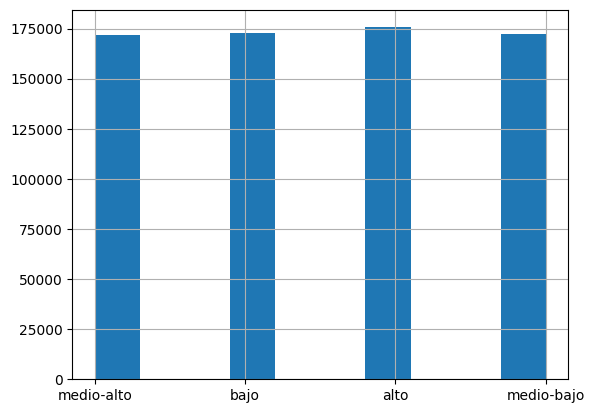

In [77]:
z.RENDIMIENTO_GLOBAL.hist()

## Convertir la columna objetivo (predicción) en valores discretos


In [78]:
y_col = 'RENDIMIENTO_GLOBAL'

rmap = {'alto': 3, 'bajo':0, 'medio-bajo':1, 'medio-alto':2}
z[y_col] = z[y_col].replace(rmap)
z.head()

C:\Users\jjcor\AppData\Local\Temp\ipykernel_15308\1309741526.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  z[y_col] = z[y_col].replace(rmap)


,ID,E_VALORMATRICULAUNIVERSIDAD,E_HORASSEMANATRABAJA,F_ESTRATOVIVIENDA,F_TIENEINTERNET,F_EDUCACIONPADRE,F_TIENELAVADORA,F_TIENEAUTOMOVIL,E_PRIVADO_LIBERTAD,F_TIENECOMPUTADOR,...,DEP_QUINDIO,DEP_RISARALDA,DEP_SANTANDER,DEP_SAN_ANDRES,DEP_SUCRE,DEP_TOLIMA,DEP_VALLE,DEP_VAUPES,PAGOMATRICULAPROPIO_No,PAGOMATRICULAPROPIO_Si
0,904256,6.0,1.0,3.0,1.0,1.0,Si,Si,N,Si,...,False,False,False,False,False,False,False,False,True,False
1,645256,4.0,0.0,3.0,0.0,1.0,Si,No,N,Si,...,False,False,False,False,False,False,False,False,True,False
2,308367,4.0,4.0,3.0,1.0,1.0,Si,No,N,No,...,False,False,False,False,False,False,False,False,True,False
3,470353,5.0,0.0,4.0,1.0,1.0,Si,No,N,Si,...,False,False,True,False,False,False,False,False,True,False
4,989032,4.0,3.0,3.0,1.0,0.0,Si,Si,N,Si,...,False,False,False,False,False,False,False,False,True,False


# Analisis

In [79]:
z.dtypes.value_counts()

bool       52
float64    10
object      5
int64       2
Name: count, dtype: int64

# Preprocesamientos

Escalado de Datos: Normalización y Estandarización
Para que tus modelos de Machine Learning funcionen mejor, es esencial escalar las características numéricas. Aquí te presento las dos técnicas más comunes:

* Normalización (Min-Max Scaling)
Esta técnica ajusta tus datos a un rango específico, generalmente entre 0 y 1. Es ideal cuando la distribución de tus datos no es una campana de Gauss, o si necesitas que todas tus características tengan el mismo rango exacto.

$$z=\frac{X-max(x)}{min(x)}$$

* Estandarización (Z-score Normalization)
La estandarización transforma tus datos para que tengan una media de 0 y una desviación estándar de 1. Es muy útil si tus datos se distribuyen de forma similar a una campana de Gauss, ya que ayuda a comparar características con diferentes unidades o escalas.

$$z=\frac{X-media(x)}{devestad(x)}$$

In [80]:
(5-3)/1

2.0

# Selección de caracteristicas



*   Selección Basada en la varianza


```
from sklearn.feature_selection import VarianceThreshold

# Eliminar características con varianza menor a un umbral
selector = VarianceThreshold(threshold=0.1)
X_selected = selector.fit_transform(X)
```



*   Selección Basada en la Correlacion


```
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Calcular la matriz de correlación
corr_matrix = np.corrcoef(X.T)

# Visualizar la matriz de correlación
sns.heatmap(corr_matrix, annot=True)
plt.show()

```

* Selección Basada en la importacia del modelo
  * Arboles de Decisión


  ```
  from sklearn.ensemble import RandomForestClassifier

  # Entrenar el modelo de Random Forest
  model = RandomForestClassifier()
  model.fit(X_train, y_train)

  # Extraer la importancia de cada característica
  importances = model.feature_importances_

  # Visualizar las características más importantes
  feature_names = df.columns
  sorted_indices = np.argsort(importances)[::-1]
  plt.bar(range(X.shape[1]), importances[sorted_indices])
  plt.xticks(range(X.shape[1]), feature_names[sorted_indices], rotation=90)
  plt.show()
  ```


  * Random Forest
  * Gradient Boosting
  * XGBoost


```
from xgboost import XGBClassifier
from xgboost import plot_importance

# Entrenar el modelo XGBoost
xgb = XGBClassifier()
xgb.fit(X_train, y_train)

# Mostrar la importancia de las características
plot_importance(xgb)
plt.show()
```



* RFE(Metodos recursivos de eliminación)


```
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

# Crear un modelo base
model = LogisticRegression()

# Inicializar RFE con el modelo
selector = RFE(estimator=model, n_features_to_select=5, step=1)
selector = selector.fit(X_train, y_train)

# Obtener las características seleccionadas
X_selected = selector.transform(X_train)

```

* Y faltan...






In [81]:
z.head()

,ID,E_VALORMATRICULAUNIVERSIDAD,E_HORASSEMANATRABAJA,F_ESTRATOVIVIENDA,F_TIENEINTERNET,F_EDUCACIONPADRE,F_TIENELAVADORA,F_TIENEAUTOMOVIL,E_PRIVADO_LIBERTAD,F_TIENECOMPUTADOR,...,DEP_QUINDIO,DEP_RISARALDA,DEP_SANTANDER,DEP_SAN_ANDRES,DEP_SUCRE,DEP_TOLIMA,DEP_VALLE,DEP_VAUPES,PAGOMATRICULAPROPIO_No,PAGOMATRICULAPROPIO_Si
0,904256,6.0,1.0,3.0,1.0,1.0,Si,Si,N,Si,...,False,False,False,False,False,False,False,False,True,False
1,645256,4.0,0.0,3.0,0.0,1.0,Si,No,N,Si,...,False,False,False,False,False,False,False,False,True,False
2,308367,4.0,4.0,3.0,1.0,1.0,Si,No,N,No,...,False,False,False,False,False,False,False,False,True,False
3,470353,5.0,0.0,4.0,1.0,1.0,Si,No,N,Si,...,False,False,True,False,False,False,False,False,True,False
4,989032,4.0,3.0,3.0,1.0,0.0,Si,Si,N,Si,...,False,False,False,False,False,False,False,False,True,False


In [82]:
z.replace(["False", "Fals", "F"], 0, inplace=True)
z.replace(["True"], 1, inplace=True)

z.replace([False], 0, inplace=True)
z.replace([True], 1, inplace=True)

C:\Users\jjcor\AppData\Local\Temp\ipykernel_15308\3414078292.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  z.replace([True], 1, inplace=True)


In [83]:
z.head()

,ID,E_VALORMATRICULAUNIVERSIDAD,E_HORASSEMANATRABAJA,F_ESTRATOVIVIENDA,F_TIENEINTERNET,F_EDUCACIONPADRE,F_TIENELAVADORA,F_TIENEAUTOMOVIL,E_PRIVADO_LIBERTAD,F_TIENECOMPUTADOR,...,DEP_QUINDIO,DEP_RISARALDA,DEP_SANTANDER,DEP_SAN_ANDRES,DEP_SUCRE,DEP_TOLIMA,DEP_VALLE,DEP_VAUPES,PAGOMATRICULAPROPIO_No,PAGOMATRICULAPROPIO_Si
0,904256,6.0,1.0,3.0,1.0,1.0,Si,Si,N,Si,...,0,0,0,0,0,0,0,0,1,0
1,645256,4.0,0.0,3.0,0.0,1.0,Si,No,N,Si,...,0,0,0,0,0,0,0,0,1,0
2,308367,4.0,4.0,3.0,1.0,1.0,Si,No,N,No,...,0,0,0,0,0,0,0,0,1,0
3,470353,5.0,0.0,4.0,1.0,1.0,Si,No,N,Si,...,0,0,1,0,0,0,0,0,1,0
4,989032,4.0,3.0,3.0,1.0,0.0,Si,Si,N,Si,...,0,0,0,0,0,0,0,0,1,0


In [84]:
z.isna().sum()

ID                             0
E_VALORMATRICULAUNIVERSIDAD    0
E_HORASSEMANATRABAJA           0
F_ESTRATOVIVIENDA              0
F_TIENEINTERNET                0
                              ..
DEP_TOLIMA                     0
DEP_VALLE                      0
DEP_VAUPES                     0
PAGOMATRICULAPROPIO_No         0
PAGOMATRICULAPROPIO_Si         0
Length: 69, dtype: int64

In [85]:
z.dtypes.value_counts()

int64      54
float64    10
object      5
Name: count, dtype: int64

In [86]:
z.to_csv('train_preprocesamiento4.csv', index=False)